In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re
import ast
import numpy as np
from itertools import combinations
import scipy.stats as stats

In [19]:
#import all of the SWR files

file_paths = [
    '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient3_part1_SWRs.csv',
    '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient5_part1L_SWRs.csv',
    '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient5_part1R_SWRs.csv',
    '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient5_part2L_SWRs.csv',
    '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient5_part2R_SWRs.csv',
    '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient6_SWRs.csv',
    '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient8_SWRs.csv',
    '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient9_SWRs.csv',
    '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient10_SWRs.csv',
    '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient11_part1_SWRs.csv',
    '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient11_part2_SWRs.csv',
    '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient12_part1_SWRs.csv',
    '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient12_part2_SWRs.csv',
    '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient13_SWRs.csv',
    '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient14_part1_SWRs.csv',
    '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient14_part2_SWRs.csv',
    '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient15_SWRs.csv',
    '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient16_SWRs.csv',
    '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient17_SWRs.csv',
    '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient19_SWRs.csv',
    '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient21_SWRs.csv',
    '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient22_SWRs.csv',
    '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient23_SWRs.csv',
    '/Users/Lea/Desktop/PROJECT_DATA_ANALYSIS/SWR_times/Patient25_SWRs.csv'
]

In [20]:
# recording durations in seconds
recording_durations = {
    'Patient3_part1': 340,
    'Patient5_part1L': 358,
    'Patient5_part1R': 313,
    'Patient5_part2L': 293,
    'Patient5_part2R': 257,
    'Patient6': 414,
    'Patient8': 575,
    'Patient9': 356,
    'Patient10': 627,
    'Patient11_part1': 431,
    'Patient11_part2': 352,
    'Patient12_part1': 409.02,
    'Patient12_part2':656.88 ,
    'Patient13': 243,
    'Patient14_part1': 452,
    'Patient14_part2': 497,
    'Patient15': 190,
    'Patient16': 181,
    'Patient17': 188,
    'Patient19': 1159,
    'Patient21': 353,
    'Patient22': 614,
    'Patient23': 758,
    'Patient25': 256
}

In [21]:
#dictionary of CSV files
data = {}
for file_path in file_paths:
    patient_id = file_path.split('/')[-1].replace('_SWRs.csv', '')
    data[patient_id] = pd.read_csv(file_path)







In [22]:
#calculate the incidance rate, mean duration and mean peak Z socred amplited acorss participants
mean_incidence_rates = []
mean_durations = []
mean_peak_amplitudes = []

for patient_id, df in data.items():
    if 'nEvents' in df.columns and 'durations' in df.columns and 'rippleAmp' in df.columns:
        if patient_id in recording_durations:
            duration = recording_durations[patient_id]
            no_channels = len(df)
            avg_nEvents = df['nEvents'].sum() / (no_channels)
            mean_incidence_rate = avg_nEvents / duration
            mean_incidence_rates.append(mean_incidence_rate)
        
        channel_durations = []
        channel_peak_amplitudes = []
        for index, row in df.iterrows():
            if row['nEvents'] > 0:
                durations_array = [float(x) for x in row['durations'].strip('[]').split()]
                avg_duration_per_channel = sum(durations_array) / row['nEvents']
                channel_durations.append(avg_duration_per_channel)
                
            
                # Split the rippleAmp string by 'array'
                ripple_amp_raw = row['rippleAmp']
                array_strings = ripple_amp_raw.split('array')
                peak_amplitudes = []
                for array_str in array_strings:
                    # Extract numerical values from each array
                    array_values = [float(val) for val in re.findall(r'[-+]?[0-9]*\.?[0-9]+', array_str)]
                    if array_values:
                        peak_amplitudes.append(max(array_values))

                if len(peak_amplitudes) > 0:
                    avg_peak_amplitude = np.mean(peak_amplitudes)
                    channel_peak_amplitudes.append(avg_peak_amplitude)
       
        if len(channel_durations) > 0:
            mean_durations.append(sum(channel_durations) / len(df))
        if len(channel_peak_amplitudes) > 0:
            mean_peak_amplitudes.append(sum(channel_peak_amplitudes) / len(df))       
        



print(len(mean_incidence_rates))
print(mean_durations)
print(mean_peak_amplitudes)





24
[0.08222792639028928, 0.08015530262885709, 0.0799765764748352, 0.08057072126979266, 0.08017525315020763, 0.07895125729438006, 0.07883924823978533, 0.08170419276106217, 0.08149130648016834, 0.0775387404144418, 0.08193406874188597, 0.08279280878194879, 0.08117810251398735, 0.0785387634564717, 0.08331841827536716, 0.08582456810741801, 0.08143796692638011, 0.07918874768941923, 0.08087254074673164, 0.08323515003601596, 0.07910956051207726, 0.07935219513585898, 0.08022479276101069, 0.07473792076659724]
[np.float64(3.168908531881733), np.float64(3.1034189270797046), np.float64(3.0892884531584444), np.float64(3.232682618153847), np.float64(3.1450409262682246), np.float64(3.3758414313532317), np.float64(3.2754266699539953), np.float64(3.0185452533244312), np.float64(3.217886752646864), np.float64(3.0652480705569523), np.float64(3.2899282669652608), np.float64(3.2160376713570447), np.float64(3.163890618713126), np.float64(3.11221139488155), np.float64(3.288375644482537), np.float64(3.41434984

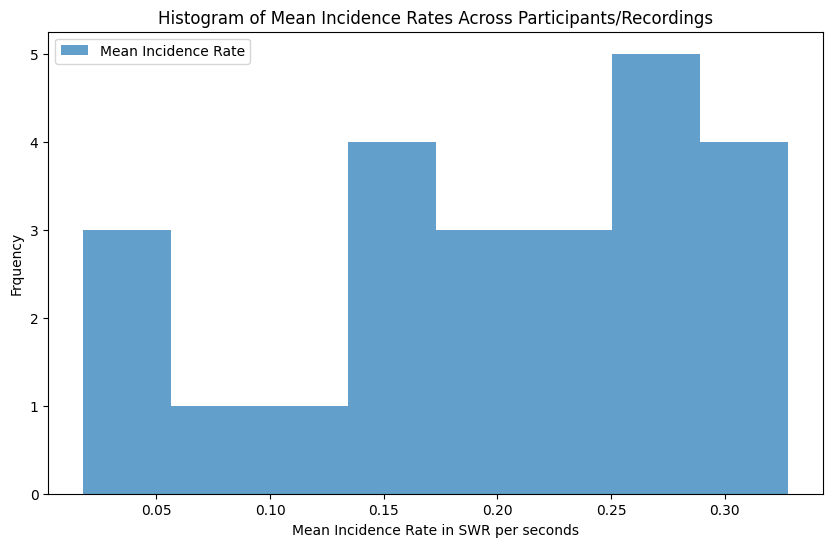

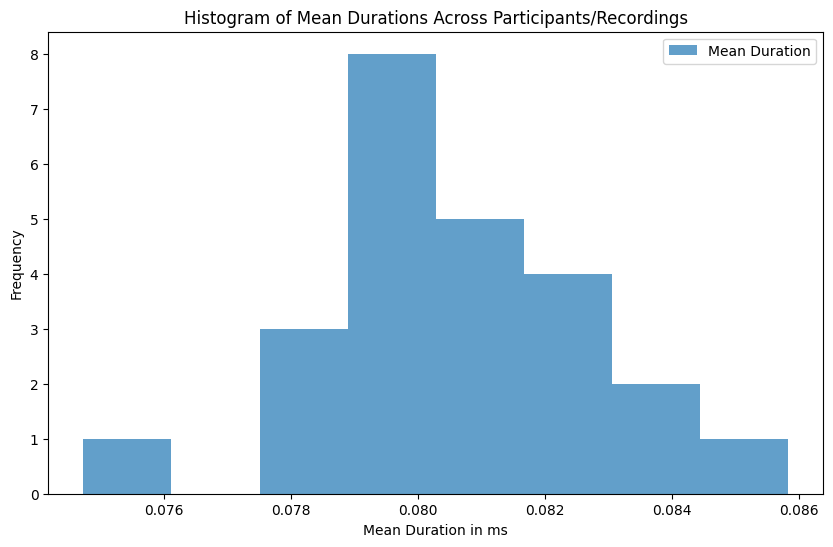

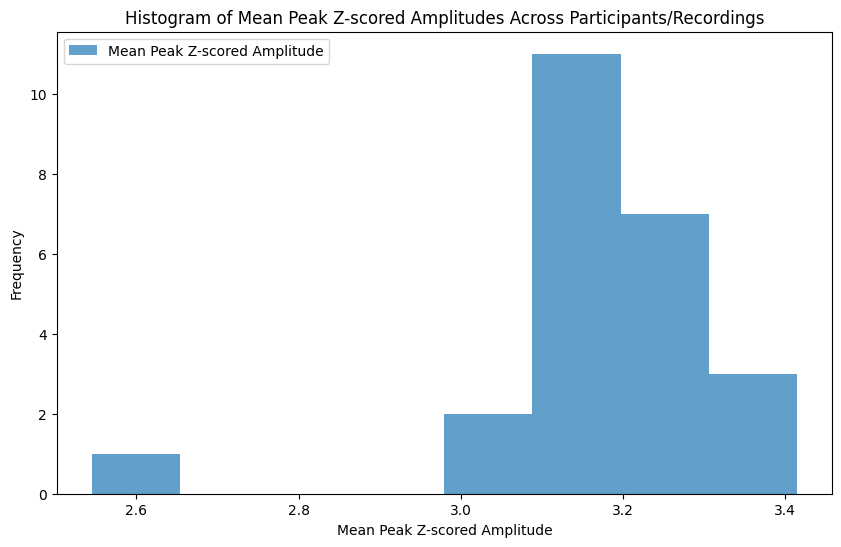

In [23]:
# Plotting histograms
plt.figure(figsize=(10, 6))
plt.hist(mean_incidence_rates, bins=8, alpha=0.7, label='Mean Incidence Rate')
plt.xlabel('Mean Incidence Rate in SWR per seconds')
plt.ylabel('Frquency') #is esentially no of recordings
plt.title('Histogram of Mean Incidence Rates Across Participants/Recordings')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(mean_durations, bins=8, alpha=0.7, label='Mean Duration')
plt.xlabel('Mean Duration in ms')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Durations Across Participants/Recordings')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(mean_peak_amplitudes, bins=8, alpha=0.7, label='Mean Peak Z-scored Amplitude')
plt.xlabel('Mean Peak Z-scored Amplitude')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Peak Z-scored Amplitudes Across Participants/Recordings')
plt.legend()
plt.show()

In [24]:
#jaccar index
def get_jaccard_index(SWR_array):
    num_channels = SWR_array.shape[0]
    jaccard_results = []

    for channel1, channel2 in combinations(range(num_channels), 2):
        SWR1 = SWR_array[channel1, :]
        SWR2 = SWR_array[channel2, :]

        intersection = np.sum(SWR1 & SWR2)
        union = np.sum(SWR1 | SWR2)

        jaccard_index = intersection / union if union > 0 else 0
        jaccard_results.append(jaccard_index)
    
    average_jaccard_index = np.mean(jaccard_results)
    return average_jaccard_index


In [25]:
# Initialize a list to store Jaccard indices for all participants
all_jaccard_indices = []

# Process each file to compute Jaccard indices
eeg_fs = 1000

for file_path in file_paths:
    patient_id = file_path.split('/')[-1].replace('_SWRs.csv', '')
    data = pd.read_csv(file_path)

    # Extract SWR times and format as arrays
    SWR_times = (data['rippleTime'].apply(lambda x: eval(x, {'array': np.array}))).tolist()
    num_channels = len(SWR_times)

    # Calculate the number of samples based on recording duration
    recording_duration = recording_durations[patient_id]
    eeg_num_samples = int(recording_duration * eeg_fs)

    # Initialize SWR array
    SWR_array = np.zeros((num_channels, eeg_num_samples), dtype=int)

    # Populate the SWR array
    for channel, times in enumerate(SWR_times):
        if not times or all(len(t) == 0 for t in times):  # Skip empty lists
            ripple_time_value = df.iloc[channel]['rippleTime'] 
            print(f"Skipping empty SWR_times for channel index {channel} in patient {patient_id}")
            continue
    
        channel_SWR_times = np.hstack(times)
        channel_SWR_idx = np.round((channel_SWR_times * eeg_fs), 0).astype(int)
        SWR_array[channel, channel_SWR_idx] = 1

    # Calculate Jaccard index for the current participant
    jaccard_index = get_jaccard_index(SWR_array)
    all_jaccard_indices.append(jaccard_index)

    





Skipping empty SWR_times for channel index 4 in patient Patient11_part2
Skipping empty SWR_times for channel index 6 in patient Patient25
Skipping empty SWR_times for channel index 16 in patient Patient25
Skipping empty SWR_times for channel index 17 in patient Patient25
Skipping empty SWR_times for channel index 21 in patient Patient25
Skipping empty SWR_times for channel index 23 in patient Patient25


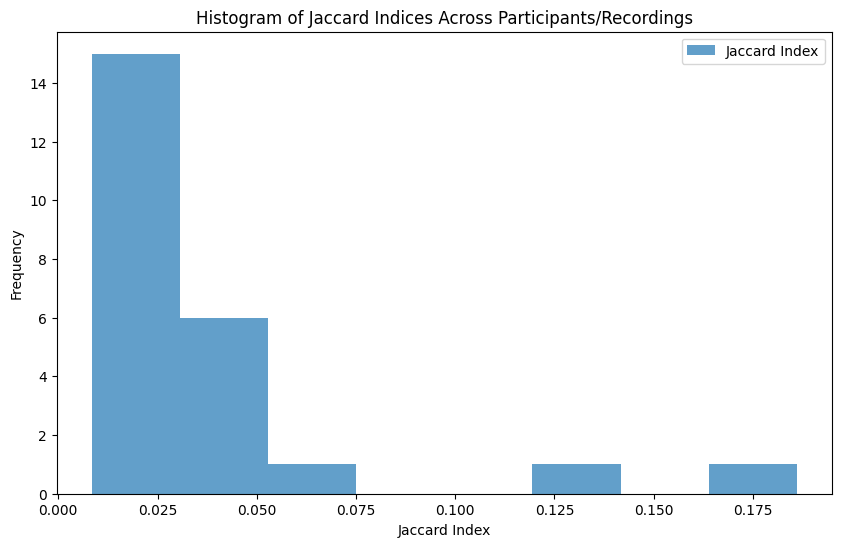

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(all_jaccard_indices, bins=8, alpha=0.7, label='Jaccard Index')
plt.xlabel('Jaccard Index')
plt.ylabel('Frequency')
plt.title('Histogram of Jaccard Indices Across Participants/Recordings')
plt.legend()
plt.show()

In [27]:
#correlation checks

#get no of channels per patient
num_channel_list = []

for file_path in file_paths:
    patient_id = file_path.split('/')[-1].replace('_SWRs.csv', '')
    data = pd.read_csv(file_path)

    SWR_times = (data['rippleTime'].apply(lambda x: eval(x, {'array': np.array}))).tolist()
    num_channels = len(SWR_times)

    num_channel_list.append(num_channels)


# Convert lists to numpy arrays for correlation analysis
mean_incidence_rates = np.array(mean_incidence_rates)
mean_durations = np.array(mean_durations)
mean_peak_amplitudes = np.array(mean_peak_amplitudes)
all_jaccard_indices = np.array(all_jaccard_indices)
num_channel_list = np.array(num_channel_list)

# Compute Pearson correlation coefficients and p-values
correlations = {
    "Jaccard Index vs. No. of Channels": stats.pearsonr(all_jaccard_indices, num_channel_list),
    "Mean Peak Amplitude vs. No. of Channels": stats.pearsonr(mean_peak_amplitudes, num_channel_list),
    "Mean Duration vs. No. of Channels": stats.pearsonr(mean_durations, num_channel_list),
    "Mean Incidence Rate vs. No. of Channels": stats.pearsonr(mean_incidence_rates, num_channel_list)
}


correlation_df = pd.DataFrame(
    [(key, corr[0], corr[1]) for key, corr in correlations.items()],
    columns=["Comparison", "Pearson Correlation Coefficient", "p-value"]
)
print(correlation_df)




                                Comparison  Pearson Correlation Coefficient  \
0        Jaccard Index vs. No. of Channels                         0.211948   
1  Mean Peak Amplitude vs. No. of Channels                         0.221429   
2        Mean Duration vs. No. of Channels                         0.030320   
3  Mean Incidence Rate vs. No. of Channels                        -0.469591   

    p-value  
0  0.320098  
1  0.298411  
2  0.888155  
3  0.020602  


In [28]:
#give list of hippocampus electrodes for eacj patient

hippocampus_electrodes = {
    'Patient3_part1': [],
    'Patient5_part1L': ['EEG026', 'EEG028', 'EEG032', 'EEG034', 'EEG057', 'EEG059'],
    'Patient5_part1R': ['EEG001', 'EEG003','EEG026', 'EEG028', 'EEG032', 'EEG034'],
    'Patient5_part2L': ['EEG026', 'EEG028', 'EEG032', 'EEG034', 'EEG057', 'EEG059'],
    'Patient5_part2R': ['EEG001', 'EEG003','EEG026', 'EEG028', 'EEG032', 'EEG034'],
    'Patient6': ['EEG001', 'EEG002','EEG003', 'EEG004', 'EEG005', 'EEG006', 'EEG007', 'EEG008'],
    'Patient8': ['EEG026', 'EEG027', 'EEG028'],
    'Patient9': [],
    'Patient10': ['EEG013'], 
    'Patient11_part1': ['EEG043', 'EEG044', 'EEG045', 'EEG046'],
    'Patient11_part2': ['EEG043', 'EEG044', 'EEG045', 'EEG046'],
    'Patient12_part1': [],
    'Patient12_part2': [],
    'Patient13': ['EEG036'] ,
    'Patient14_part1': ['EEG001','EEG041', 'EEG042', 'EEG043'],
    'Patient14_part2': ['EEG001', 'EEG041', 'EEG042', 'EEG043'],
    'Patient15': [],
    'Patient16': ['EEG003'],
    'Patient17': ['EEG003', 'EEG004', 'EEG005', 'EEG006'],
    'Patient19': [],
    'Patient21': ['EEG002','EEG003', 'EEG004', 'EEG005'],
    'Patient22': ['EEG001', 'EEG002', 'EEG003', 'EEG017', 'EEG018', 'EEG019', 'EEG020', 'EEG021', 'EEG022'],
    'Patient23': ['EEG057', 'EEG058', 'EEG059'],
    'Patient25': ['EEG049', 'EEG050']
}

In [29]:


data = {}
for file_path in file_paths:
    patient_id = file_path.split('/')[-1].replace('_SWRs.csv', '')
    data[patient_id] = pd.read_csv(file_path)


print("Available patient IDs in data:", list(data.keys()))



Available patient IDs in data: ['Patient3_part1', 'Patient5_part1L', 'Patient5_part1R', 'Patient5_part2L', 'Patient5_part2R', 'Patient6', 'Patient8', 'Patient9', 'Patient10', 'Patient11_part1', 'Patient11_part2', 'Patient12_part1', 'Patient12_part2', 'Patient13', 'Patient14_part1', 'Patient14_part2', 'Patient15', 'Patient16', 'Patient17', 'Patient19', 'Patient21', 'Patient22', 'Patient23', 'Patient25']


In [30]:
hippocampus_mean_incidence_rates = []
hippocampus_mean_durations = []
hippocampus_mean_peak_amplitudes = []
hippocampus_all_jaccard_indices = []

eeg_fs = 1000



for patient_id, electrodes in hippocampus_electrodes.items():
    df = data[patient_id]  
    df = df[df['Channel'].isin(electrodes)]
    if df.empty:
        print(f"No hippocampal channels found for {patient_id}")
        continue
    
    SWR_times = (df['rippleTime'].apply(lambda x: eval(x, {'array': np.array}))).tolist()
    duration = recording_durations[patient_id]
    eeg_no_samples = int(duration * eeg_fs)
    no_channels = len(df)

    SWR_array = np.zeros((no_channels, eeg_no_samples), dtype=int)
    for channel, times in enumerate(SWR_times):
        if not times or all(len(t) == 0 for t in times):  # Skip empty lists
            ripple_time_value = df.iloc[channel]['rippleTime'] 
            print(f"Skipping empty SWR_times for channel index {channel} in patient {patient_id}")
            continue

        channel_SWR_times = np.hstack(times)
        channel_SWR_idx = np.round((channel_SWR_times * eeg_fs), 0).astype(int)
        SWR_array[channel, channel_SWR_idx] = 1

    jaccard_index = get_jaccard_index(SWR_array)
    hippocampus_all_jaccard_indices.append(jaccard_index)
    
    avg_nEvents = df['nEvents'].sum() / (no_channels)
    mean_incidence_rate = avg_nEvents / duration
    hippocampus_mean_incidence_rates.append(mean_incidence_rate) #this works

    channel_durations = []
    channel_peak_amplitudes = []
    for index, row in df.iterrows():
        if row['nEvents'] > 0:
                durations_array = [float(x) for x in row['durations'].strip('[]').split()]
                avg_duration_per_channel = sum(durations_array) / row['nEvents']
                channel_durations.append(avg_duration_per_channel)
                
                # Split the rippleAmp string by 'array'
                ripple_amp_raw = row['rippleAmp']
                array_strings = ripple_amp_raw.split('array')
                peak_amplitudes = []
                for array_str in array_strings:
                    # Extract numerical values from each array
                    array_values = [float(val) for val in re.findall(r'[-+]?[0-9]*\.?[0-9]+', array_str)]
                    if array_values:
                        peak_amplitudes.append(max(array_values))

                if len(peak_amplitudes) > 0:
                    avg_peak_amplitude = np.mean(peak_amplitudes)
                    channel_peak_amplitudes.append(avg_peak_amplitude)
       
    if len(channel_durations) > 0:
        hippocampus_mean_durations.append(sum(channel_durations) / len(df))
    if len(channel_peak_amplitudes) > 0:
        hippocampus_mean_peak_amplitudes.append(sum(channel_peak_amplitudes) / len(df))      
    


                
            
            
            
            
print(len(hippocampus_mean_incidence_rates))     
print(len(hippocampus_mean_durations))    
print(len(hippocampus_mean_peak_amplitudes)) 
print((hippocampus_all_jaccard_indices))  

    

No hippocampal channels found for Patient3_part1
No hippocampal channels found for Patient9
No hippocampal channels found for Patient12_part1
No hippocampal channels found for Patient12_part2
No hippocampal channels found for Patient15
No hippocampal channels found for Patient19


/Users/lea/Desktop/PROJECT_DATA_ANALYSIS/venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/lea/Desktop/PROJECT_DATA_ANALYSIS/venv/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


18
18
18
[np.float64(0.023839160579018935), np.float64(0.02576458077650522), np.float64(0.01871371822456661), np.float64(0.021403370828244624), np.float64(0.09725837953233682), np.float64(0.11906305855867244), np.float64(nan), np.float64(0.1530071077312494), np.float64(0.11356051733838612), np.float64(nan), np.float64(0.14616554797814033), np.float64(0.11028478037606178), np.float64(nan), np.float64(0.089574992140271), np.float64(0.04500654229605205), np.float64(0.027182291654211207), np.float64(0.03376339841476754), np.float64(0.028810895756940808)]


In [31]:
#average of hippocampus

mean_rate_H = sum(hippocampus_mean_incidence_rates) / len(hippocampus_mean_incidence_rates)
mean_duration_all_H = sum(hippocampus_mean_durations) / len(hippocampus_mean_durations)
mean_amplitude_all_H = sum(hippocampus_mean_peak_amplitudes) / len(hippocampus_mean_peak_amplitudes)
mean_jaccard_index_all_H = np.nanmean(hippocampus_all_jaccard_indices)


print(f'HIPPOCAMPUS rate: {mean_rate_H}, amp: {mean_amplitude_all_H} , dur: {mean_duration_all_H}, jaccard index: {mean_jaccard_index_all_H}')

HIPPOCAMPUS rate: 0.20258702110669513, amp: 3.2064255350663626 , dur: 0.08127136573067402, jaccard index: 0.070226556145695


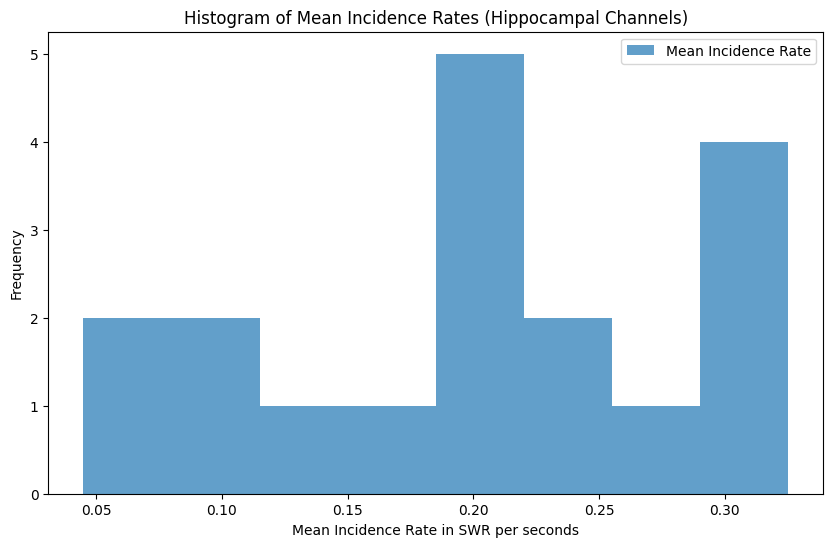

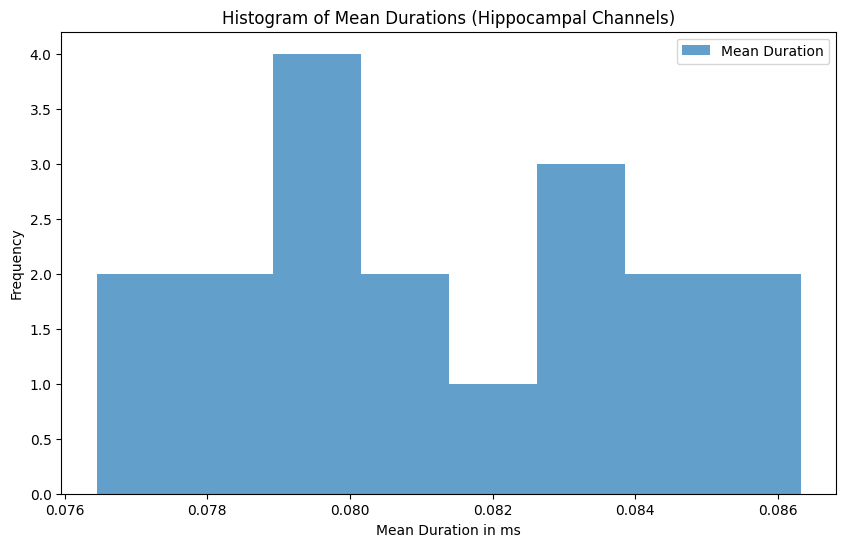

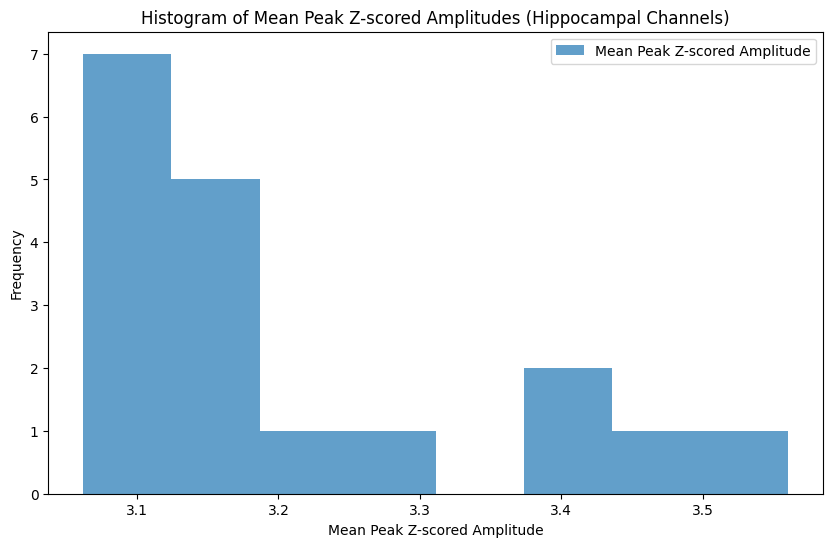

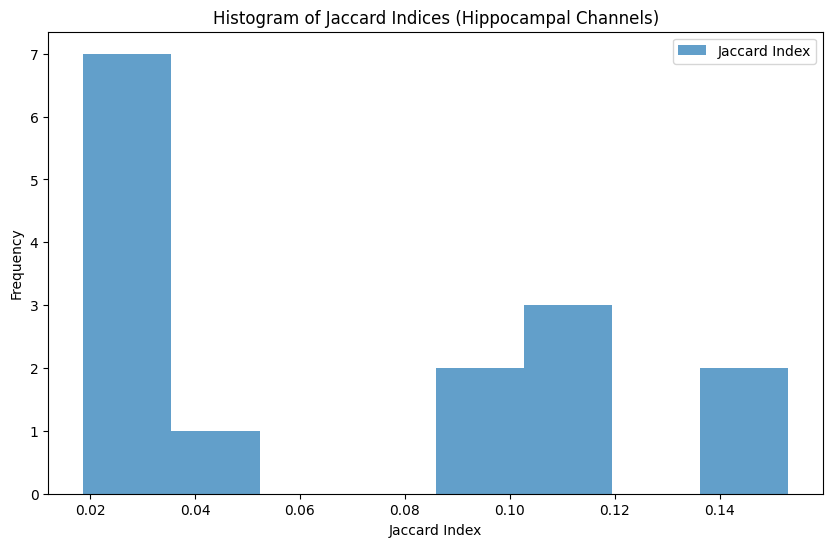

In [32]:
# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(hippocampus_mean_incidence_rates, bins=8, alpha=0.7, label='Mean Incidence Rate')
plt.xlabel('Mean Incidence Rate in SWR per seconds')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Incidence Rates (Hippocampal Channels)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(hippocampus_mean_durations, bins=8, alpha=0.7, label='Mean Duration')
plt.xlabel('Mean Duration in ms')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Durations (Hippocampal Channels)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(hippocampus_mean_peak_amplitudes, bins=8, alpha=0.7, label='Mean Peak Z-scored Amplitude')
plt.xlabel('Mean Peak Z-scored Amplitude')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Peak Z-scored Amplitudes (Hippocampal Channels)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(hippocampus_all_jaccard_indices, bins=8, alpha=0.7, label='Jaccard Index')
plt.xlabel('Jaccard Index')
plt.ylabel('Frequency')
plt.title('Histogram of Jaccard Indices (Hippocampal Channels)')
plt.legend()
plt.show()


In [33]:
#HIPPOCAMPUS AVERAGE RATE PER CONTACT, AVERAGE DURATION/PEAK AMPLITUDE ACROSS ALL RIPPLES AND JACCARD INDEX PER PERSON

hippocampus_all_incidence_rates = []
hippocampus_all_durations = []
hippocampus_all_peak_amplitudes = []
hippocampus_all_jaccard_indices = []

eeg_fs = 1000

for patient_id, electrodes in hippocampus_electrodes.items():
    df = data[patient_id]
    df = df[df['Channel'].isin(electrodes)]
    if df.empty:
        print(f"No hippocampal channels found for {patient_id}")
        continue

    SWR_times = (df['rippleTime'].apply(lambda x: eval(x, {'array': np.array}))).tolist()
    duration = recording_durations[patient_id]
    eeg_no_samples = int(duration * eeg_fs)
    no_channels = len(df)

    SWR_array = np.zeros((no_channels, eeg_no_samples), dtype=int)
    for channel, times in enumerate(SWR_times):
        if not times or all(len(t) == 0 for t in times):
            ripple_time_value = df.iloc[channel]['rippleTime']
            print(f"Skipping empty SWR_times for channel index {channel} in patient {patient_id}")
            continue

        channel_SWR_times = np.hstack(times)
        channel_SWR_idx = np.round((channel_SWR_times * eeg_fs), 0).astype(int)
        SWR_array[channel, channel_SWR_idx] = 1

    jaccard_index = get_jaccard_index(SWR_array)
    hippocampus_all_jaccard_indices.append(jaccard_index)

    for index, row in df.iterrows():
        if row['nEvents'] > 0:
            duration_list = [float(x) for x in row['durations'].strip('[]').split()]
            ripple_amp_raw = row['rippleAmp']
            array_strings = ripple_amp_raw.split('array')
            peak_amplitudes = []
            for array_str in array_strings:
                array_values = [float(val) for val in re.findall(r'[-+]?[0-9]*\.?[0-9]+', array_str)]
                if array_values:
                    peak_amplitudes.append(max(array_values))

            hippocampus_all_durations.extend(duration_list)
            hippocampus_all_peak_amplitudes.extend(peak_amplitudes)
            hippocampus_all_incidence_rates.append(row['nEvents'] / duration)

# Results
print(len(hippocampus_all_incidence_rates))  # total hippocampal channels with events
print(len(hippocampus_all_durations))        # total number of ripple durations collected
print(len(hippocampus_all_peak_amplitudes))  # total number of peak amplitudes collected
print(len(hippocampus_all_jaccard_indices))

No hippocampal channels found for Patient3_part1
No hippocampal channels found for Patient9
No hippocampal channels found for Patient12_part1
No hippocampal channels found for Patient12_part2
No hippocampal channels found for Patient15
No hippocampal channels found for Patient19
76
6301
6301
18


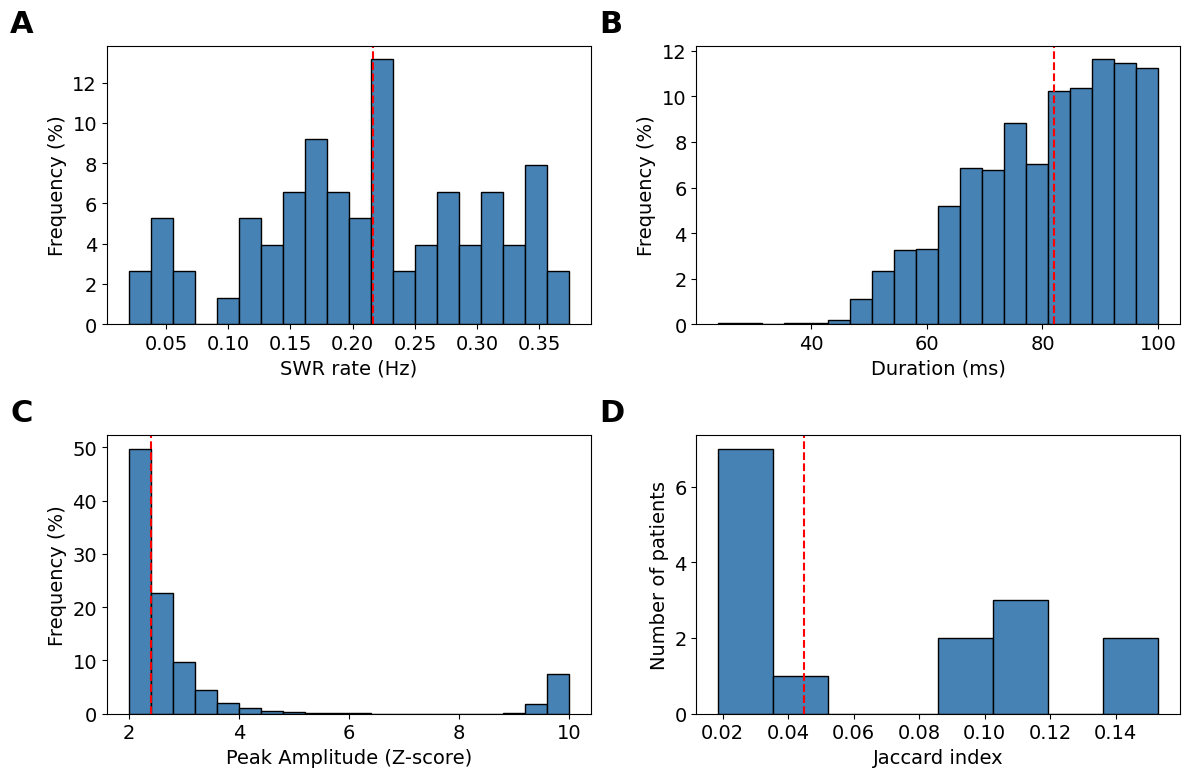

 jacard mean: 0.04500654229605205
 mean dur ; 82.0
 mean amp : 2.40407919
 mean rate : 0.21618357487922707
Standard Deviation - Ripple Rate: 0.0896 Hz
Standard Deviation - Duration: 13.38 ms
Standard Deviation - Peak Amplitude: 2.17 Z-score
Standard Deviation - Jaccard Index: 0.0478


In [42]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

plt.rcParams.update({'font.size': 14})

# Histogram A: Ripple Rate per Channel
rates = hippocampus_all_incidence_rates
axes[0, 0].hist(rates, bins=20, color='steelblue', edgecolor='black', weights=np.ones_like(rates) * 100. / len(rates))
#axes[0, 0].set_title(f"Ripple rate\n(n={len(rates)} contacts)", fontsize=12, fontweight='bold')
axes[0, 0].text(-0.2, 1.05, 'A', transform=axes[0, 0].transAxes, fontsize=22, fontweight='bold')
axes[0, 0].set_xlabel("SWR rate (Hz)")
axes[0, 0].set_ylabel("Frequency (%)")
median_rate = np.median(rates)
axes[0, 0].axvline(median_rate, color='red', linestyle='--')

# Histogram B: Duration of Ripples
durations = hippocampus_all_durations
# convert durations from seconds to milliseconds
durations = [d * 1000 for d in durations]
axes[0, 1].hist(durations, bins=20, color='steelblue', edgecolor='black', weights=np.ones_like(durations) * 100. / len(durations))
#axes[0, 1].set_title(f"Duration of ripples\n(n={len(durations)} ripples)", fontsize=12, fontweight='bold')
axes[0, 1].text(-0.2, 1.05, 'B', transform=axes[0, 1].transAxes, fontsize=22, fontweight='bold')
axes[0, 1].set_xlabel("Duration (ms)")
axes[0, 1].set_ylabel("Frequency (%)")
median_duration = np.median(durations)

axes[0, 1].axvline(median_duration, color='red', linestyle='--', label=f'Mean = {median_duration:.1f} ms')


# Histogram C: Peak Amplitude
amplitudes = hippocampus_all_peak_amplitudes
axes[1, 0].hist(amplitudes, bins=20, color='steelblue', edgecolor='black', weights=np.ones_like(amplitudes) * 100. / len(amplitudes))
#axes[1, 0].set_title(f"Peak Amplitude of ripples\n(n={len(amplitudes)} ripples)", fontsize=12, fontweight='bold')
axes[1, 0].text(-0.2, 1.05, 'C', transform=axes[1, 0].transAxes, fontsize=22, fontweight='bold')
axes[1, 0].set_xlabel("Peak Amplitude (Z-score)")
axes[1, 0].set_ylabel("Frequency (%)")
median_amp = np.median(amplitudes)
axes[1, 0].axvline(median_amp, color='red', linestyle='--')

# Histogram D: Jaccard Index per Patient
jaccard = hippocampus_all_jaccard_indices
# Jaccard Index plot (D)
jaccard = hippocampus_all_jaccard_indices
jaccard = [j for j in jaccard if not np.isnan(j)]
mean_jaccard = np.mean(jaccard)
axes[1, 1].hist(jaccard, bins=8, color='steelblue', edgecolor='black')
#axes[1, 1].set_title(f"Jaccard index\n(n={len(jaccard)} patients)", fontsize=12, fontweight='bold')
axes[1, 1].text(-0.2, 1.05, 'D', transform=axes[1, 1].transAxes, fontsize=22, fontweight='bold')
axes[1, 1].set_xlabel("Jaccard index")
axes[1, 1].set_ylabel("Number of patients")
median_jaccard = np.median(jaccard)
axes[1, 1].axvline(x=median_jaccard, ymin=0, ymax=1, color='red', linestyle='--', label=f'Mean = {mean_jaccard:.2f}')


plt.tight_layout()
plt.show()








print(f' jacard mean: {median_jaccard}')
print(f' mean dur ; {median_duration}')
print(f' mean amp : {median_amp}')
print(f' mean rate : {median_rate}')


# Print standard deviations for the four parameters
std_rate = np.std(rates)
std_duration = np.std(durations)
std_amplitude = np.std(amplitudes)
std_jaccard = np.std(jaccard)

print(f"Standard Deviation - Ripple Rate: {std_rate:.4f} Hz")
print(f"Standard Deviation - Duration: {std_duration:.2f} ms")
print(f"Standard Deviation - Peak Amplitude: {std_amplitude:.2f} Z-score")
print(f"Standard Deviation - Jaccard Index: {std_jaccard:.4f}")





In [71]:
nonhippocampus_mean_incidence_rates = []
nonhippocampus_mean_durations = []
nonhippocampus_mean_peak_amplitudes = []
nonhippocampus_all_jaccard_indices = []

eeg_fs = 1000

for patient_id, electrodes in hippocampus_electrodes.items():
    df = data[patient_id]  
    df = df[~df['Channel'].isin(electrodes)]
    if df.empty:
        print(f"No non-hippocampal channels found for {patient_id}")
        continue

    SWR_times = (df['rippleTime'].apply(lambda x: eval(x, {'array': np.array}))).tolist()
    duration = recording_durations[patient_id]
    eeg_no_samples = int(duration * eeg_fs)
    no_channels = len(df)

    SWR_array = np.zeros((no_channels, eeg_no_samples), dtype=int)
    for channel, times in enumerate(SWR_times):
        if not times or all(len(t) == 0 for t in times):  # Skip empty lists
            ripple_time_value = df.iloc[channel]['rippleTime'] 
            print(f"Skipping empty SWR_times for channel index {channel} in patient {patient_id}")
            continue

        channel_SWR_times = np.hstack(times)
        channel_SWR_idx = np.round((channel_SWR_times * eeg_fs), 0).astype(int)
        SWR_array[channel, channel_SWR_idx] = 1

    jaccard_index = get_jaccard_index(SWR_array)
    nonhippocampus_all_jaccard_indices.append(jaccard_index)
   
   
   
    avg_nEvents = df['nEvents'].sum() / (no_channels)
    mean_incidence_rate = avg_nEvents / duration
    nonhippocampus_mean_incidence_rates.append(mean_incidence_rate) #this works

    channel_durations = []
    channel_peak_amplitudes = []
    for index, row in df.iterrows():
        if row['nEvents'] > 0:
                durations_array = [float(x) for x in row['durations'].strip('[]').split()]
                avg_duration_per_channel = sum(durations_array) / row['nEvents']
                channel_durations.append(avg_duration_per_channel)
                
                # Split the rippleAmp string by 'array'
                ripple_amp_raw = row['rippleAmp']
                array_strings = ripple_amp_raw.split('array')
                peak_amplitudes = []
                for array_str in array_strings:
                    # Extract numerical values from each array
                    array_values = [float(val) for val in re.findall(r'[-+]?[0-9]*\.?[0-9]+', array_str)]
                    if array_values:
                        peak_amplitudes.append(max(array_values))

                if len(peak_amplitudes) > 0:
                    avg_peak_amplitude = np.mean(peak_amplitudes)
                    channel_peak_amplitudes.append(avg_peak_amplitude)
       
    if len(channel_durations) > 0:
        nonhippocampus_mean_durations.append(sum(channel_durations) / len(df))
    if len(channel_peak_amplitudes) > 0:
        nonhippocampus_mean_peak_amplitudes.append(sum(channel_peak_amplitudes) / len(df))      
    

print(len(nonhippocampus_mean_durations))
print(len(nonhippocampus_mean_incidence_rates))
print(len(nonhippocampus_mean_peak_amplitudes))
print(len(nonhippocampus_all_jaccard_indices))

No non-hippocampal channels found for Patient5_part1R
No non-hippocampal channels found for Patient5_part2R
Skipping empty SWR_times for channel index 4 in patient Patient11_part2
Skipping empty SWR_times for channel index 6 in patient Patient25
Skipping empty SWR_times for channel index 16 in patient Patient25
Skipping empty SWR_times for channel index 17 in patient Patient25
Skipping empty SWR_times for channel index 21 in patient Patient25
Skipping empty SWR_times for channel index 23 in patient Patient25
22
22
22
22


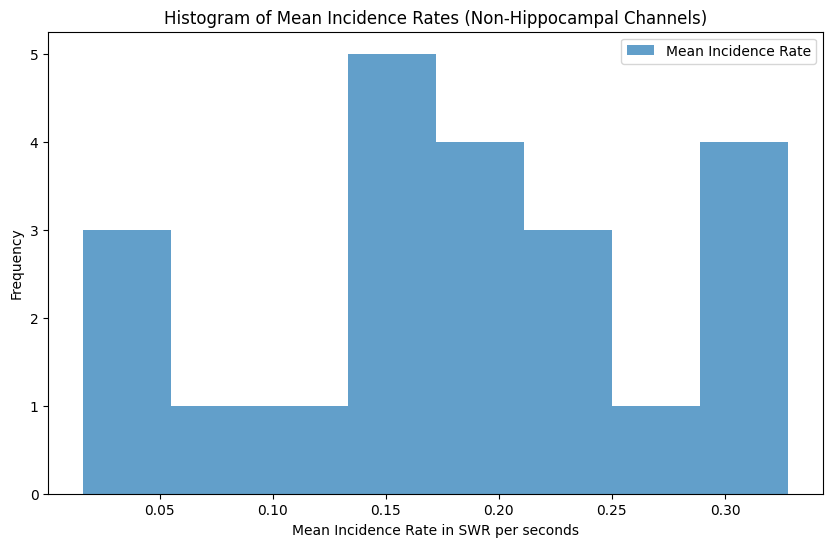

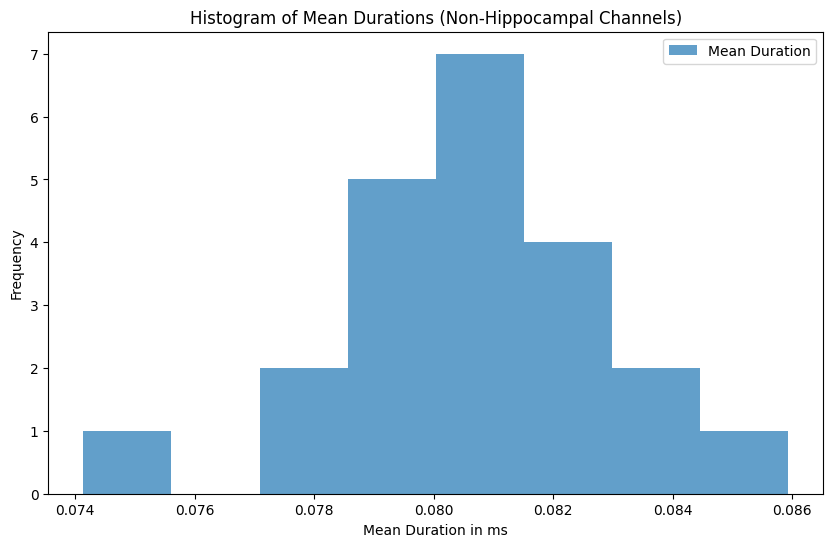

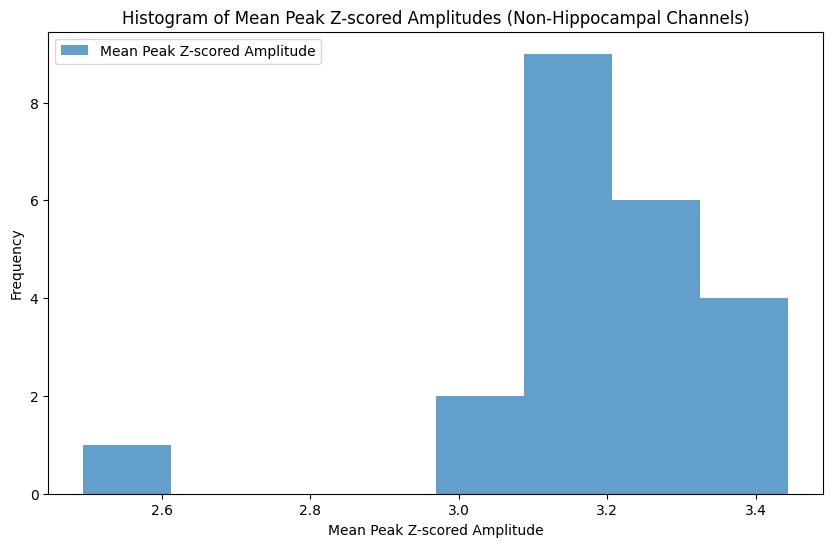

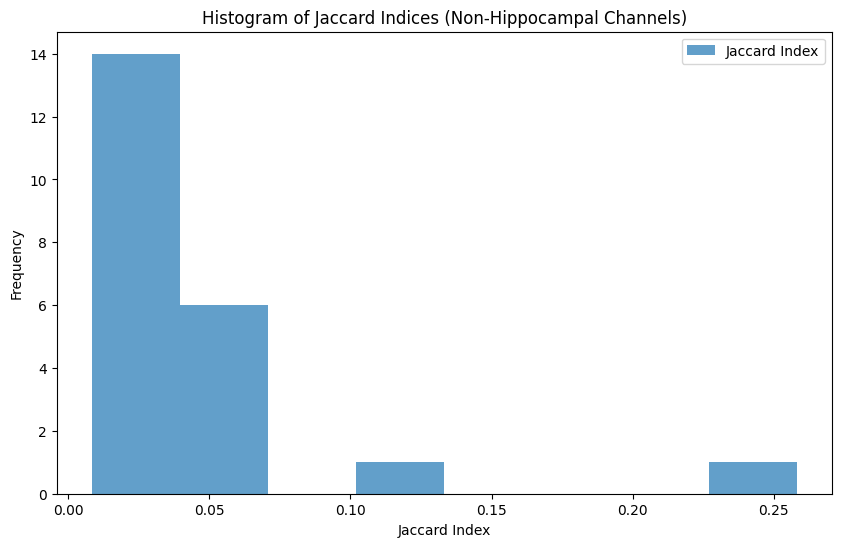

In [73]:

plt.figure(figsize=(10, 6))
plt.hist(nonhippocampus_mean_incidence_rates, bins=8, alpha=0.7, label='Mean Incidence Rate')
plt.xlabel('Mean Incidence Rate in SWR per seconds')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Incidence Rates (Non-Hippocampal Channels)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(nonhippocampus_mean_durations, bins=8, alpha=0.7, label='Mean Duration')
plt.xlabel('Mean Duration in ms')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Durations (Non-Hippocampal Channels)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(nonhippocampus_mean_peak_amplitudes, bins=8, alpha=0.7, label='Mean Peak Z-scored Amplitude')
plt.xlabel('Mean Peak Z-scored Amplitude')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Peak Z-scored Amplitudes (Non-Hippocampal Channels)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(nonhippocampus_all_jaccard_indices, bins=8, alpha=0.7, label='Jaccard Index')
plt.xlabel('Jaccard Index')
plt.ylabel('Frequency')
plt.title('Histogram of Jaccard Indices (Non-Hippocampal Channels)')
plt.legend()
plt.show()